In [31]:
# Scientific libraries
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Graphic libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import japanize_matplotlib
import seaborn as sns
# import holoviews as hv
# from bokeh.io import output_notebook
# output_notebook()
# from bokeh.io import show
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# from ipywidgets import interact # Interactive graph

# Statistical libraries
# import statsmodels.stats as stats
# import statsmodels.stats.multicomp as multi
# import statsmodels.formula.api as smf
import scikit_posthocs as sp

# Other libraries
# import re
# from datetime import datetime
# import collections

# Creating alias for magic commands
%alias_magic t time

from icecream import ic

import math
from scipy.stats import norm

Created `%t` as an alias for `%time`.
Created `%%t` as an alias for `%%time`.


# GLM v.s. T-test

- 正規分布
- Welch's t-test
- GLM(Normal)

Welch's T-test
p-value: 0.832930672417

Likelihood-ratio test
p-value: 0.821614625496



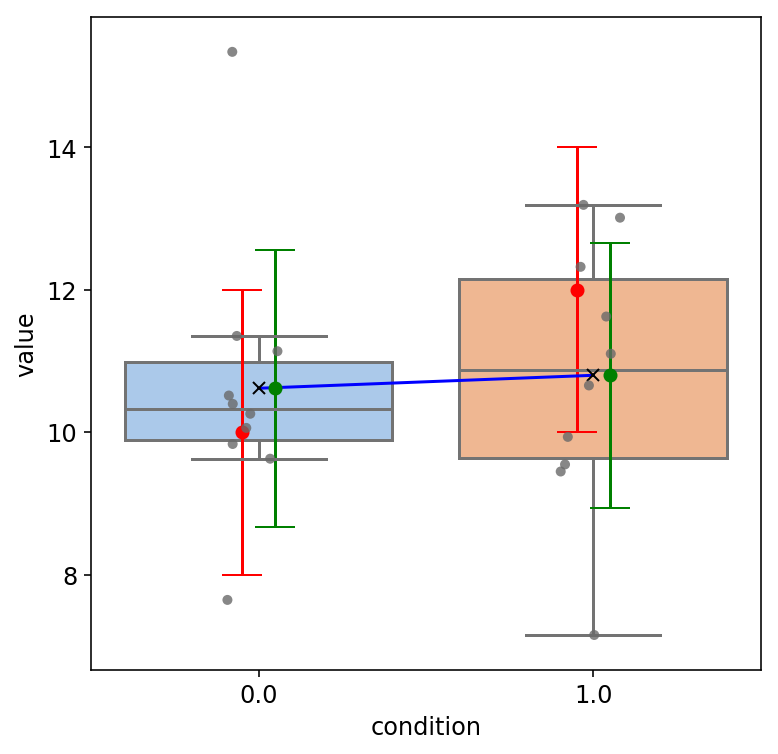

In [2]:
sample_num = 10
mu_1  = 10
sig_1 = 2
mu_2  = 12
sig_2 = 2

y_1 = np.random.normal(mu_1, sig_1, sample_num)
y_2 = np.random.normal(mu_2, sig_2, sample_num)

df = pd.DataFrame(([np.concatenate([np.zeros(sample_num),
                                    np.ones(sample_num)]),
                    np.concatenate([y_1, y_2])]),
                  index=["condition", "value"]).T

welch_res = stats.ttest_ind(df[df["condition"] == 0]["value"],
                            df[df["condition"] == 1]["value"], 
                            equal_var=False)
p_welch = welch_res.pvalue
print("Welch's T-test")
print("p-value: {:.12f}".format(p_welch))
if p_welch < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_welch < 0.01:
    print("** Significant; p < 0.01")
elif p_welch < 0.05:
    print("* significant; p < 0.05")
print()

model_cond = smf.glm("value ~ condition",
                 data=df).fit()
model_const = smf.glm("value ~ 1",
                 data=df).fit()

p_glm = model_cond.pvalues["condition"]
# print("GLM")
# print("p-value: {:.12f}".format(p_glm))
# if p_glm < 0.001:
#     print("*** SIGNIFICANT; p < 0.001")
# elif p_glm < 0.01:
#     print("** Significant; p < 0.01")
# elif p_glm < 0.05:
#     print("* significant; p < 0.05")
# print()

# display(model_cond.summary())
# display(model_const.summary())

b_1_cond = model_cond.params["Intercept"]
b_2_cond = model_cond.params["condition"]
b_1_const = model_const.params["Intercept"]

chisq_df = model_const.df_resid - model_cond.df_resid
lf_r = -2*(model_const.llf - model_cond.llf)
p_lf_r = stats.chi2.sf(lf_r, df=chisq_df)
print("Likelihood-ratio test")
print("p-value: {:.12f}".format(p_lf_r))
if p_lf_r < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_lf_r < 0.01:
    print("** Significant; p < 0.01")
elif p_lf_r < 0.05:
    print("* significant; p < 0.05")
print()

# sm.stats.anova_lm(model_cond, model_const, test='Chisq')

###################################

# Set parameters
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df,
            x="condition",
            y="value",
            showmeans=True,
            meanprops={"marker": "x",
                       "markeredgecolor": "black"},
            palette="pastel",
            fliersize=0)
sns.stripplot(data=df,
              x="condition",
              y="value",
              color="dimgrey",
              alpha=0.8)

# GLM
ax.plot([0, 1],
        [b_1_cond, b_1_cond + b_2_cond],
        'b-')

# Observed
ax.errorbar([0.05, 1.05],
            [y_1.mean(), y_2.mean()],
            yerr=[y_1.std(ddof=1),
                  y_2.std(ddof=1)],
            fmt='o',
            color='green',
            capsize=10
            )
# Real
ax.errorbar([-0.05, 0.95],
            [mu_1, mu_2],
            yerr=[sig_1, sig_2],
            fmt='o',
            color='red',
            capsize=10
            )
plt.show()

# GLM v.s. T-test (not proper test)

- 非負(Poisson分布)
- Welch's t-test (本来ただしくない)
- GLM(Poisson)

Welch's T-test
p-value: 0.101062846195

Optimization terminated successfully.
         Current function value: 2.384126
         Iterations 4
Optimization terminated successfully.
         Current function value: 2.424179
         Iterations 1
Likelihood-ratio test
p-value: 0.073448059143



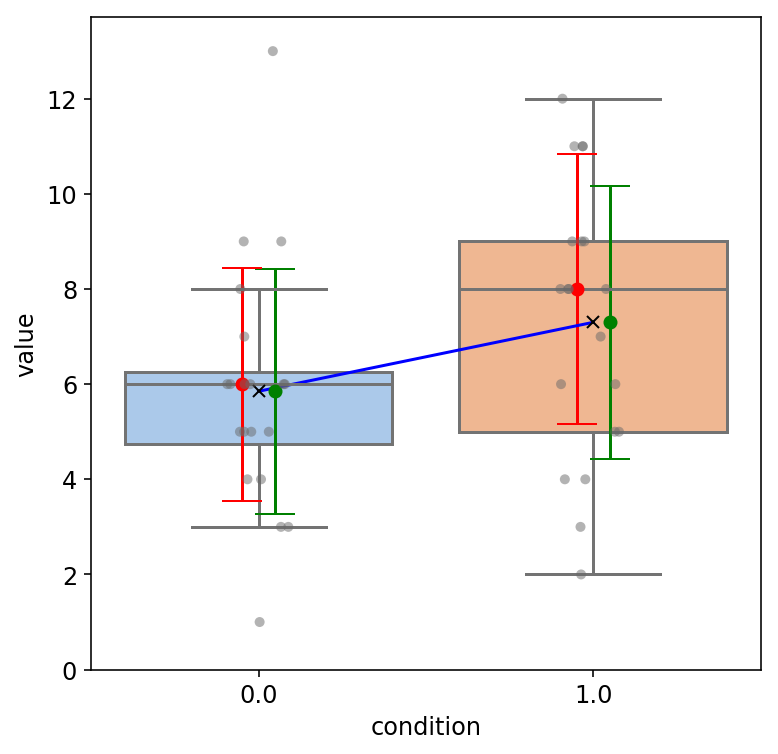

In [3]:
sample_num = 20
lambda_1  = 6
lambda_2  = 8

y_1 = np.random.poisson(lambda_1, sample_num)
y_2 = np.random.poisson(lambda_2, sample_num)

df = pd.DataFrame(([np.concatenate([np.zeros(sample_num),
                                    np.ones(sample_num)]),
                    np.concatenate([y_1, y_2])]),
                  index=["condition", "value"]).T

welch_res = stats.ttest_ind(df[df["condition"] == 0]["value"],
                            df[df["condition"] == 1]["value"], 
                            equal_var=False)
p_welch = welch_res.pvalue
print("Welch's T-test")
print("p-value: {:.12f}".format(p_welch))
if p_welch < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_welch < 0.01:
    print("** Significant; p < 0.01")
elif p_welch < 0.05:
    print("* significant; p < 0.05")
print()

model_cond = smf.poisson("value ~ condition",
                 data=df).fit()
model_const = smf.poisson("value ~ 1",
                 data=df).fit()

p_glm = model_cond.pvalues["condition"]
# print("GLM")
# print("p-value: {:.12f}".format(p_glm))
# if p_glm < 0.001:
#     print("*** SIGNIFICANT; p < 0.001")
# elif p_glm < 0.01:
#     print("** Significant; p < 0.01")
# elif p_glm < 0.05:
#     print("* significant; p < 0.05")
# print()

# display(model_cond.summary())
# display(model_const.summary())

b_1_cond = model_cond.params["Intercept"]
b_2_cond = model_cond.params["condition"]
b_1_const = model_const.params["Intercept"]

chisq_df = model_const.df_resid - model_cond.df_resid
lf_r = -2*(model_const.llf - model_cond.llf)
p_lf_r = stats.chi2.sf(lf_r, df=chisq_df)
print("Likelihood-ratio test")
print("p-value: {:.12f}".format(p_lf_r))
if p_lf_r < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_lf_r < 0.01:
    print("** Significant; p < 0.01")
elif p_lf_r < 0.05:
    print("* significant; p < 0.05")
print()

# sm.stats.anova_lm(model_cond, model_const, test='Chisq')

###################################

# Set parameters
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df,
            x="condition",
            y="value",
            showmeans=True,
            meanprops={"marker": "x",
                       "markeredgecolor": "black"},
            palette="pastel",
            fliersize=0)
sns.stripplot(data=df,
              x="condition",
              y="value",
              color="dimgrey",
              alpha=0.5)

# GLM
ax.plot([0, 1],
        [np.exp(b_1_cond), np.exp(b_1_cond + b_2_cond)],
        'b-')

# Observed
ax.errorbar([0.05, 1.05],
            [y_1.mean(), y_2.mean()],
            yerr=[y_1.std(ddof=1),
                  y_2.std(ddof=1)],
            fmt='o',
            color='green',
            capsize=10
            )
# Real
ax.errorbar([-0.05, 0.95],
            [lambda_1, lambda_2],
            yerr=[np.sqrt(lambda_1), np.sqrt(lambda_2)],
            fmt='o',
            color='red',
            capsize=10
            )

ax.set_ylim(0, )
plt.show()

# GLM v.s. ノンパラメトリック手法

- 非負(Poisson分布)
- Mann-Whitney's U test
- GLM(Poisson)

Wilcoxon's rank test
p-value: 0.095976966939

Optimization terminated successfully.
         Current function value: 1.325249
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.436221
         Iterations 1
Likelihood-ratio test
p-value: 0.002886604430
** Significant; p < 0.01



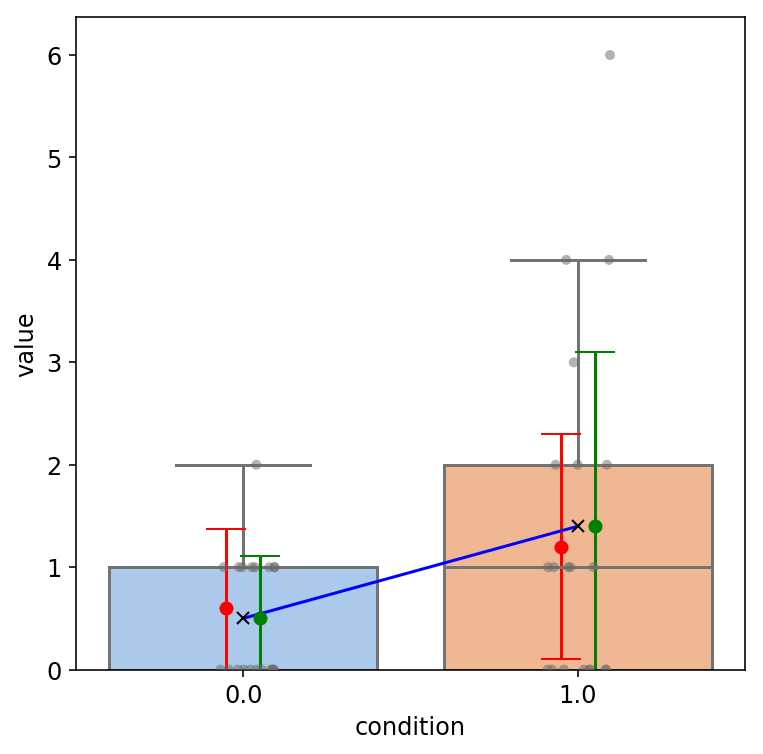

In [117]:
sample_num = 20
lambda_1  = 0.6
lambda_2  = 1.2

y_1 = np.random.poisson(lambda_1, sample_num)
y_2 = np.random.poisson(lambda_2, sample_num)

df = pd.DataFrame(([np.concatenate([np.zeros(sample_num),
                                    np.ones(sample_num)]),
                    np.concatenate([y_1, y_2])]),
                  index=["condition", "value"]).T

p_mnwhtn = sp.posthoc_mannwhitney(df,
                                  val_col="value",
                                  group_col="condition")
p_mnwhtn = p_mnwhtn[0][1]

print("Wilcoxon's rank test")
print("p-value: {:.12f}".format(p_mnwhtn))
if p_mnwhtn < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_mnwhtn < 0.01:
    print("** Significant; p < 0.01")
elif p_mnwhtn < 0.05:
    print("* significant; p < 0.05")
print()

model_cond = smf.poisson("value ~ condition",
                 data=df).fit()
model_const = smf.poisson("value ~ 1",
                 data=df).fit()

p_glm = model_cond.pvalues["condition"]
# print("GLM")
# print("p-value: {:.12f}".format(p_glm))
# if p_glm < 0.001:
#     print("*** SIGNIFICANT; p < 0.001")
# elif p_glm < 0.01:
#     print("** Significant; p < 0.01")
# elif p_glm < 0.05:
#     print("* significant; p < 0.05")
# print()

# display(model_cond.summary())
# display(model_const.summary())

b_1_cond = model_cond.params["Intercept"]
b_2_cond = model_cond.params["condition"]
b_1_const = model_const.params["Intercept"]

chisq_df = model_const.df_resid - model_cond.df_resid
lf_r = -2*(model_const.llf - model_cond.llf)
p_lf_r = stats.chi2.sf(lf_r, df=chisq_df)
print("Likelihood-ratio test")
print("p-value: {:.12f}".format(p_lf_r))
if p_lf_r < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_lf_r < 0.01:
    print("** Significant; p < 0.01")
elif p_lf_r < 0.05:
    print("* significant; p < 0.05")
print()

# sm.stats.anova_lm(model_cond, model_const, test='Chisq')

###################################

# Set parameters
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df,
            x="condition",
            y="value",
            showmeans=True,
            meanprops={"marker": "x",
                       "markeredgecolor": "black"},
            palette="pastel",
            fliersize=0)
sns.stripplot(data=df,
              x="condition",
              y="value",
              color="dimgrey",
              alpha=0.5)

# GLM
ax.plot([0, 1],
        [np.exp(b_1_cond), np.exp(b_1_cond + b_2_cond)],
        'b-')

# Observed
ax.errorbar([0.05, 1.05],
            [y_1.mean(), y_2.mean()],
            yerr=[y_1.std(ddof=1),
                  y_2.std(ddof=1)],
            fmt='o',
            color='green',
            capsize=10
            )
# Real
ax.errorbar([-0.05, 0.95],
            [lambda_1, lambda_2],
            yerr=[np.sqrt(lambda_1), np.sqrt(lambda_2)],
            fmt='o',
            color='red',
            capsize=10
            )

ax.set_ylim(0, )
plt.show()

# GLM v.s. ノンパラメトリック手法

- 非負(Poisson分布)
- Steel-Dwass
- GLM(Poisson)

Dwass, Steel, Critchlow and Fligner all-pairs comparison test
p-value: 0.001000000000
** Significant; p < 0.01

Optimization terminated successfully.
         Current function value: 1.464566
         Iterations 6
Optimization terminated successfully.
         Current function value: 1.678778
         Iterations 1
Likelihood-ratio test
p-value: 0.000000397686
*** SIGNIFICANT; p < 0.001



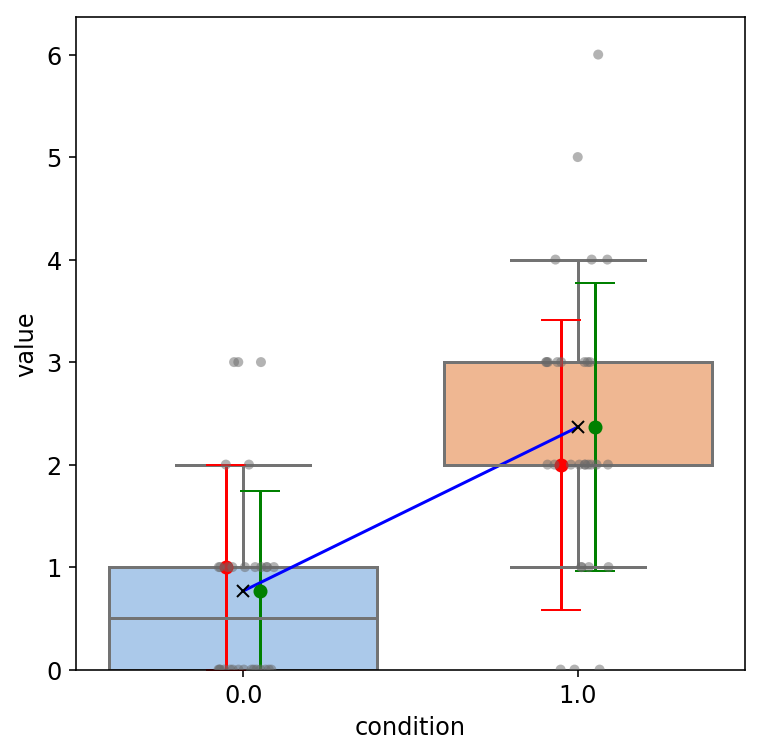

In [163]:
sample_num = 30
lambda_1  = 1
lambda_2  = 2

y_1 = np.random.poisson(lambda_1, sample_num)
y_2 = np.random.poisson(lambda_2, sample_num)

df = pd.DataFrame(([np.concatenate([np.zeros(sample_num),
                                    np.ones(sample_num)]),
                    np.concatenate([y_1, y_2])]),
                  index=["condition", "value"]).T

p_dscf = sp.posthoc_dscf(df,
                         val_col="value",
                         group_col="condition")
p_dscf = p_dscf[0][1]

print("Dwass, Steel, Critchlow and Fligner all-pairs comparison test")
print("p-value: {:.12f}".format(p_dscf))
if p_dscf < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_dscf < 0.01:
    print("** Significant; p < 0.01")
elif p_dscf < 0.05:
    print("* significant; p < 0.05")
print()

model_cond = smf.poisson("value ~ condition",
                 data=df).fit()
model_const = smf.poisson("value ~ 1",
                 data=df).fit()

p_glm = model_cond.pvalues["condition"]
# print("GLM")
# print("p-value: {:.12f}".format(p_glm))
# if p_glm < 0.001:
#     print("*** SIGNIFICANT; p < 0.001")
# elif p_glm < 0.01:
#     print("** Significant; p < 0.01")
# elif p_glm < 0.05:
#     print("* significant; p < 0.05")
# print()

# display(model_cond.summary())
# display(model_const.summary())

b_1_cond = model_cond.params["Intercept"]
b_2_cond = model_cond.params["condition"]
b_1_const = model_const.params["Intercept"]

chisq_df = model_const.df_resid - model_cond.df_resid
lf_r = -2*(model_const.llf - model_cond.llf)
p_lf_r = stats.chi2.sf(lf_r, df=chisq_df)
print("Likelihood-ratio test")
print("p-value: {:.12f}".format(p_lf_r))
if p_lf_r < 0.001:
    print("*** SIGNIFICANT; p < 0.001")
elif p_lf_r < 0.01:
    print("** Significant; p < 0.01")
elif p_lf_r < 0.05:
    print("* significant; p < 0.05")
print()

# sm.stats.anova_lm(model_cond, model_const, test='Chisq')

###################################

# Set parameters
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df,
            x="condition",
            y="value",
            showmeans=True,
            meanprops={"marker": "x",
                       "markeredgecolor": "black"},
            palette="pastel",
            fliersize=0)
sns.stripplot(data=df,
              x="condition",
              y="value",
              color="dimgrey",
              alpha=0.5)

# GLM
ax.plot([0, 1],
        [np.exp(b_1_cond), np.exp(b_1_cond + b_2_cond)],
        'b-')

# Observed
ax.errorbar([0.05, 1.05],
            [y_1.mean(), y_2.mean()],
            yerr=[y_1.std(ddof=1),
                  y_2.std(ddof=1)],
            fmt='o',
            color='green',
            capsize=10
            )
# Real
ax.errorbar([-0.05, 0.95],
            [lambda_1, lambda_2],
            yerr=[np.sqrt(lambda_1), np.sqrt(lambda_2)],
            fmt='o',
            color='red',
            capsize=10
            )

ax.set_ylim(0, )
plt.show()